In [1]:
# Import libraries to be used in the analysis

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import seaborn as sns


In [2]:
# 1 Set the Path from the. Style csv file name  = Path("../csv file name.csv.")
# 2 Read the csv into a DataFrame using pandas, (style:  investment name_dataframe = pd read_csv(Path from above)
aapl_csv = Path("../Resources/aapl_historical.csv")
algo_csv = Path("../Resources/algo_returns.csv")
cost_csv = Path("../Resources/cost_historical.csv")
goog_csv = Path("../Resources/goog_historical.csv")
sp500_csv = Path("../Resources/sp500_history.csv")
whale_csv = Path("../Resources/whale_returns.csv")

In [3]:
# Read the csv into a DataFrame using pandas, (style:  investment name_dataframe = pd read_csv(Path from above)
aapl_returns = pd.read_csv(aapl_csv)
algo_returns = pd.read_csv(algo_csv)
cost_returns = pd.read_csv(cost_csv)
goog_returns = pd.read_csv(goog_csv)
sp500_returns = pd.read_csv(sp500_csv)
whale_returns = pd.read_csv(whale_csv)

In [4]:
#Cleaning the data 
whale_returns.dtypes

Date                            object
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [5]:
# Checing for null values. Remove
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop the null values in the cmombined dataFrame
whale_returns.dropna(inplace=True)
whale_returns.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [7]:
# Check for  nulll values after data is cleaned 
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [8]:
# Set date as the index and drop the extra column
whale_returns.set_index(pd.to_datetime(whale_returns['Date'], infer_datetime_format = True), inplace = True)
whale_returns.drop(columns=['Date'], inplace=True)
whale_returns.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [9]:
# Algo return evcaluation of the data for data cleaning
algo_returns.dtypes

Date       object
Algo 1    float64
Algo 2    float64
dtype: object

In [10]:
# Check a seond time for null values in the algorithm returns
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop the algo null values 
algo_returns.dropna(inplace=True)
algo_returns.head()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761


In [12]:
# Set the date as the index for the dataFrame
algo_returns.set_index(pd.to_datetime(algo_returns['Date'], infer_datetime_format = True), inplace = True)
algo_returns.head()

,Date,Algo 1,Algo 2
Date,,,
2014-06-05,2014-06-05,0.004062,0.013285
2014-06-06,2014-06-06,0.001857,0.008284
2014-06-09,2014-06-09,-0.005012,0.005668
2014-06-10,2014-06-10,0.004406,-0.000735
2014-06-11,2014-06-11,0.004760,-0.003761


In [13]:
# Drop unnecessary columns in the Algo data 
algo_returns.drop(columns=['Date'], inplace=True)

In [14]:
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [15]:
# SOrt values in the Algo dataFrame from earliest date to lastest date
algo_returns.sort_values("Date")

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [16]:
# Reading the S&P 500 data from teh csv file
sp500_returns = pd.read_csv(sp500_csv)
sp500_returns.dtypes


Date     object
Close    object
dtype: object

In [17]:
# setting the date as the index for teh S&P 500 data Frame
sp500_returns.set_index(pd.to_datetime(sp500_returns['Date'], infer_datetime_format = True), inplace = True)
sp500_returns.head()

,Date,Close
Date,,
2019-04-23,23-Apr-19,$2933.68
2019-04-22,22-Apr-19,$2907.97
2019-04-18,18-Apr-19,$2905.03
2019-04-17,17-Apr-19,$2900.45
2019-04-16,16-Apr-19,$2907.06


In [18]:
# Drop unnecessary columns 
sp500_returns.drop(columns=['Date'], inplace=True)

In [19]:
# Drop the $ in from teh data frame and replace it with a space 
sp500_returns["Close"] = sp500_returns["Close"].str.replace("$", " ")
sp500_returns.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [20]:
# Change teh data type to float for teh figure in treh data frame
sp500_returns["Close"]=sp500_returns["Close"].astype(float)

In [21]:
# Returns thge datatype of the S&P 500 data frame
sp500_returns.dtypes

Close    float64
dtype: object

In [22]:
# Calculate the percent change of the SP 500 so that the analysis can begin.
sp500_calculated_returns = sp500_returns.pct_change().dropna()
sp500_calculated_returns
column_name = ["SP500"]
sp500_calculated_returns.columns = column_name


In [23]:
# Sorts value in ascending order 
sp500_calculated_returns.sort_values("Date")

,SP500
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469
...,...
2019-04-15,-0.000509
2019-04-16,0.002279
2019-04-17,-0.001577


In [24]:
# Now that all data has been cleaned and sorted, all the dataframes have to be Concatenated
combined_returns = pd.concat([whale_returns, algo_returns, sp500_calculated_returns], axis='columns', join ="inner")
combined_returns



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


In [25]:
# Standard deviation of returns of each portfolio
daily_std = combined_returns.std()
daily_std.head()


SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
dtype: float64

In [26]:
# Daily Standard Deviation, sorted from highest to lowest
daily_std = daily_std.sort_values(ascending=False)
daily_std.head()

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
SP500                          0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
dtype: float64

In [27]:
# Calculate the annualized standard deviation

annualized_std=daily_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
SP500                          0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

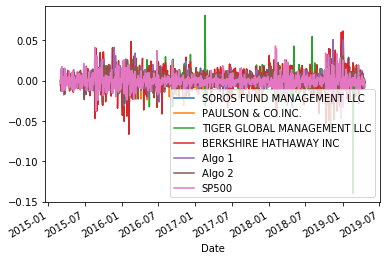

In [28]:
# Combined returns of the entire dataframe
combined_returns.plot()

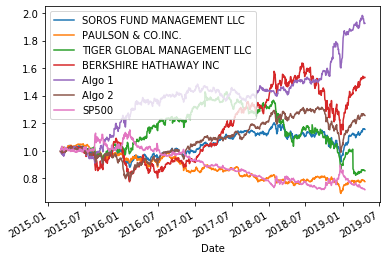

In [29]:
# Plot of the cumulative Returns of each portfolio 
cumulative_returns = (1 + combined_returns).cumprod()
cumulative_returns.plot()


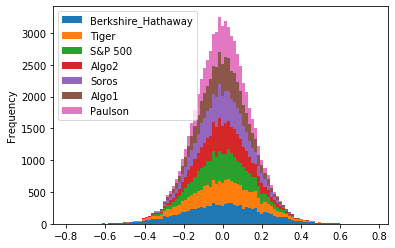

In [30]:
# Box plot to visually show risk
Berkshire_Hathaway = np.random.normal(scale=0.205, size=10000)
Tiger  = np.random.normal(scale=.173, size=10000)
SP500 = np.random.normal(scale=.136, size=10000)
Algo2 = np.random.normal(scale=.132, size=10000)
Soros = np.random.normal(scale=.125, size=10000)
Algo1 = np.random.normal(scale=.121, size=10000)
Paulson =  np.random.normal(scale=.111, size=10000)

portfolio_std = pd.DataFrame({
    "Berkshire_Hathaway": Berkshire_Hathaway,
    "Tiger": Tiger,
    "S&P 500": SP500,
    "Algo2": Algo2,
    "Soros": Soros,
    "Algo1": Algo1,
    "Paulson": Paulson
})

portfolio_std.plot.hist(stacked=True, bins=100)

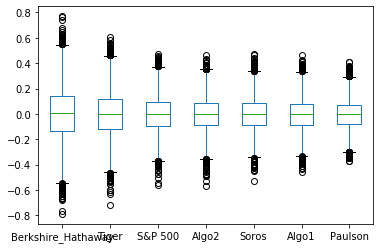

In [67]:
# Box plot of the different portfolios 
portfolio_std.plot.box()

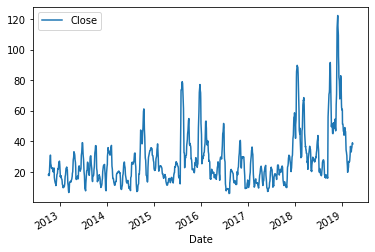

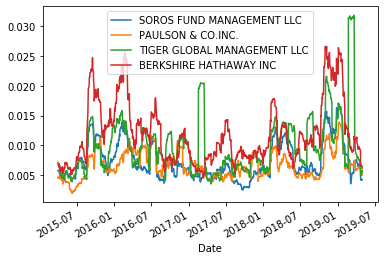

In [32]:
# Calculate and plot the rolling standard deviation 
# the S&P 500 and whale portfolios using a 21 trading day window
sp500_returns_21 = sp500_returns.rolling(window=21).std()
whale_returns_21 = whale_returns.rolling(window=21).std()
sp500_returns_21.plot()
whale_returns_21.plot()

In [33]:
# Calculation of Daily Returns 
correlation = combined_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


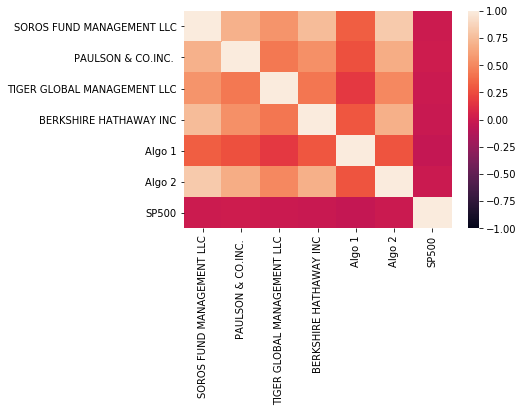

In [34]:
# Create a heatmap of the correlation 
sns.heatmap(correlation, vmin=-1, vmax = 1)

In [35]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
covariance = combined_returns['BERKSHIRE HATHAWAY INC'].cov(combined_returns['SP500'])
variance = combined_returns['SP500'].var()
covariance

-1.5371091324717554e-06

In [36]:
# call the variance
variance 

7.373467552840441e-05

In [37]:
# Calculate Beta 
beta = covariance/variance
beta

-0.020846489408902644

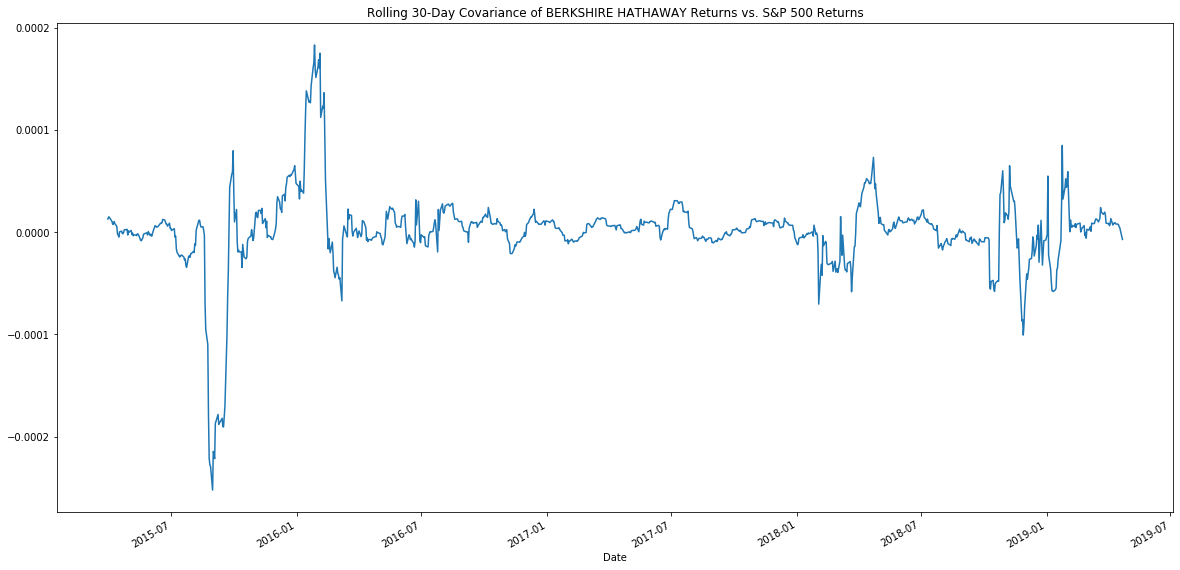

In [68]:
#Calculate beta of Berkshire Hathaway relative to the S&P 
rolling_covariance = combined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(combined_returns['SP500'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 21-Day Covariance of BERKSHIRE HATHAWAY Returns vs. S&P 500 Returns')


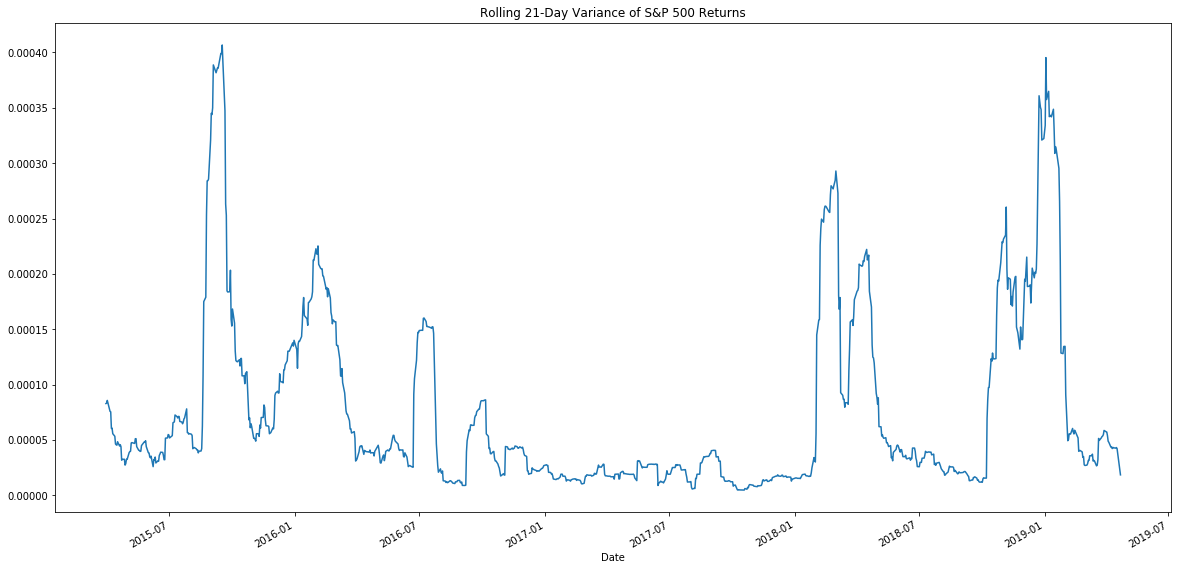

In [69]:
rolling_variance = combined_returns['SP500'].rolling(window=21).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 21-Day Variance of S&P 500 Returns')


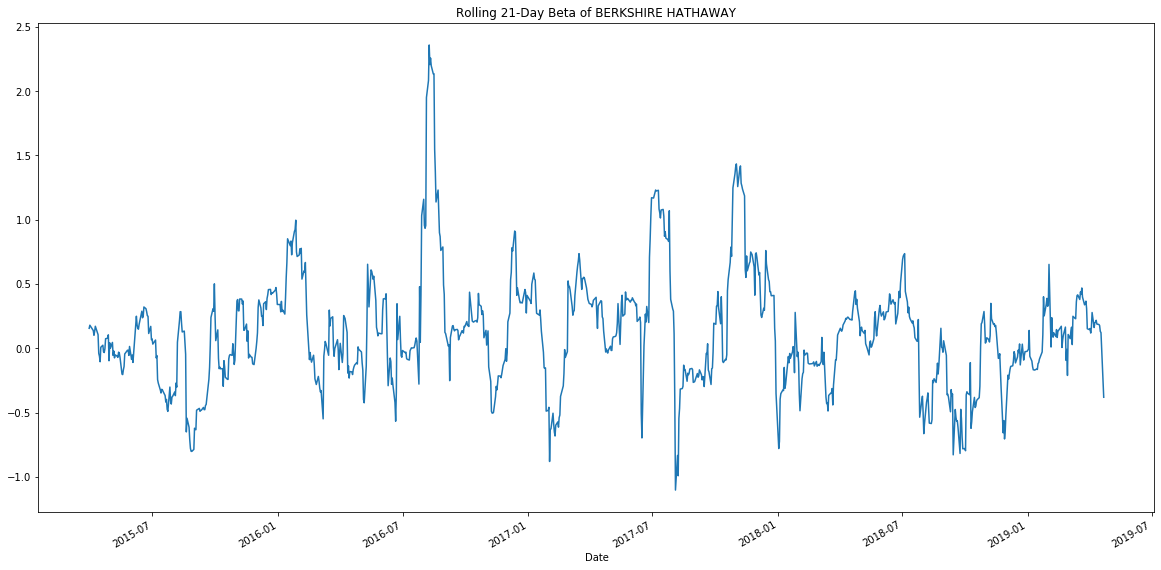

In [70]:
#Calculation of rolling beta relative the S&P 
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 21-Day Beta of BERKSHIRE HATHAWAY')


In [41]:
# Calculation of Sharpe Ratios 
sharpe_ratios = (combined_returns.mean()*252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500                         -0.518582
dtype: float64

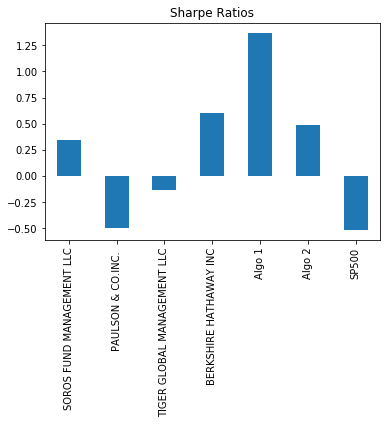

In [42]:
sharpe_ratios.plot(kind ='bar', title = 'Sharpe Ratios')


In [43]:
#                CUSTOM PORTFOLIO ANALYSIS 

In [44]:
# Set the csv path from the customized portolio and then read bthe data into a dataframe
custom_portfolio_csv = Path("../Resources/custom_portfolio.csv")
my_returns = pd.read_csv(custom_portfolio_csv)
my_returns

,Date,LULU,BX,JNK,GLD
0,1/2/2015,55.34,33.48,116.04,114.08
1,1/5/2015,55.96,32.99,115.23,115.80
2,1/6/2015,55.57,32.36,114.69,117.12
3,1/7/2015,57.65,32.82,115.32,116.43
4,1/8/2015,59.07,33.07,116.10,115.94
...,...,...,...,...,...
1347,5/11/2020,245.62,53.16,97.93,159.42
1348,5/12/2020,242.60,52.47,97.35,160.04
1349,5/13/2020,229.39,50.12,97.08,161.58
1350,5/14/2020,237.57,50.60,97.13,163.01


In [45]:
my_returns.set_index(pd.to_datetime(my_returns['Date'], infer_datetime_format = True), inplace = True)
my_returns.drop(columns=['Date'], inplace=True)
my_returns.head()


,LULU,BX,JNK,GLD
Date,,,,
2015-01-02,55.34,33.48,116.04,114.08
2015-01-05,55.96,32.99,115.23,115.80
2015-01-06,55.57,32.36,114.69,117.12
2015-01-07,57.65,32.82,115.32,116.43
2015-01-08,59.07,33.07,116.10,115.94


In [46]:
my_returns_1 = my_returns.pct_change().dropna()
my_returns_1

,LULU,BX,JNK,GLD
Date,,,,
2015-01-05,0.011203,-0.014636,-0.006980,0.015077
2015-01-06,-0.006969,-0.019097,-0.004686,0.011399
2015-01-07,0.037430,0.014215,0.005493,-0.005891
2015-01-08,0.024631,0.007617,0.006764,-0.004209
2015-01-09,-0.007449,0.014817,0.005426,0.011385
...,...,...,...,...
2020-05-11,0.032060,0.005485,-0.000510,-0.006234
2020-05-12,-0.012295,-0.012980,-0.005923,0.003889
2020-05-13,-0.054452,-0.044787,-0.002773,0.009623


In [47]:
#Calculation of the returns an equal weighted portfolio
weights = [0.25, 0.25, 0.25, 0.25]
portfolio_returns = my_returns_1.dot(weights)
portfolio_returns.head()

Date
2015-01-05    0.001166
2015-01-06   -0.004838
2015-01-07    0.012812
2015-01-08    0.008701
2015-01-09    0.006045
dtype: float64

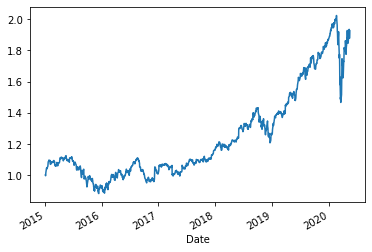

In [48]:
cumulative_returns = (1 + portfolio_returns).cumprod().plot()

In [49]:
# Standard deviation of each stock within the portfolio 
volatility= my_returns_1.std()*np.sqrt(252)
volatility

LULU    0.394007
BX      0.333359
JNK     0.091617
GLD     0.135190
dtype: float64

In [50]:
# Concated the custome portfolio of 4 eaually weighted stocks to the original data frame with the returns
combined_returns_1 = pd.concat([combined_returns,portfolio_returns], axis='columns', join ="inner")
combined_returns_1

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,0
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.009150
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.002562
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.000890
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.020525
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,-0.003145
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.002802
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.004930
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.003514


In [51]:
# Renamed the last column, called '0' to 'Ivan Portfolio'
combined_returns_1=combined_returns_1.rename(columns={0:"Ivan Portfolio"})
combined_returns_1

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Ivan Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.009150
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.002562
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.000890
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.020525
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,-0.003145
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.002802
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.004930
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.003514


In [52]:
# Daily standard deviation 
daily_std_1 = combined_returns_1.std()
daily_std_1

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
Ivan Portfolio                 0.008577
dtype: float64

In [53]:
# Annualized standard deviation 
annualized_std_1=daily_std_1 * np.sqrt(252)
annualized_std_1

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500                          0.136313
Ivan Portfolio                 0.136156
dtype: float64

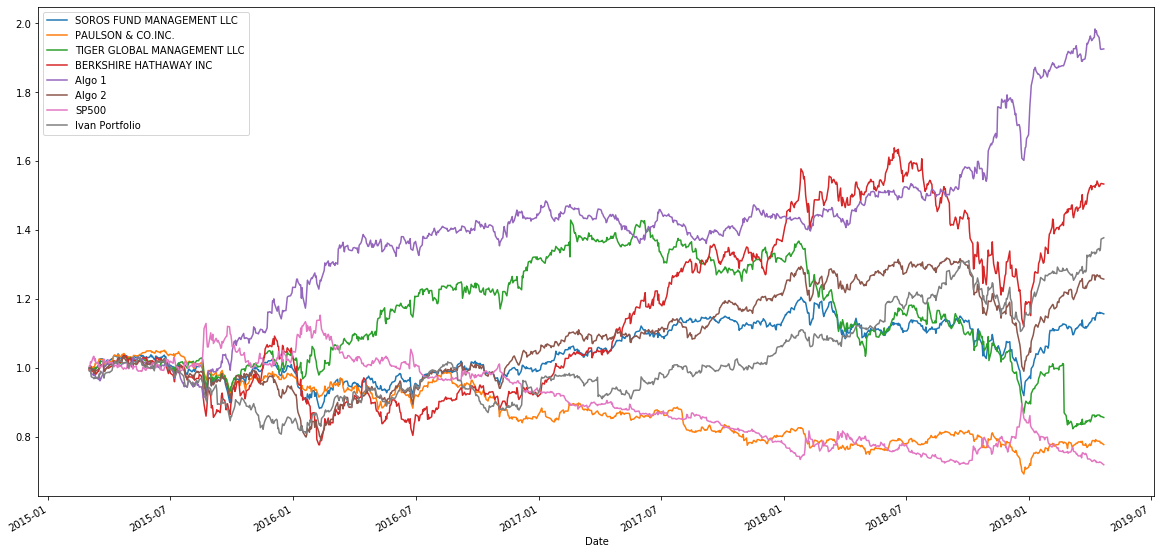

In [71]:
# This the plot of the the custom portfolio with the orgiginal data fram of the whale, Algo and S&P returns
cumulative_returns_1 = (1 + combined_returns_1).cumprod()
cumulative_returns_1.plot(figsize=(20,10))

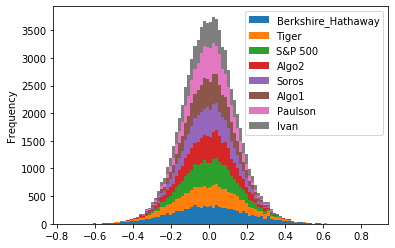

In [55]:
Berkshire_Hathaway = np.random.normal(scale=0.205, size=10000)
Tiger  = np.random.normal(scale=.173, size=10000)
SP500 = np.random.normal(scale=.136, size=10000)
Algo2 = np.random.normal(scale=.132, size=10000)
Soros = np.random.normal(scale=.125, size=10000)
Algo1 = np.random.normal(scale=.121, size=10000)
Paulson =  np.random.normal(scale=.111, size=10000)
Ivan = np.random.normal(scale=.1361, size = 10000)

portfolio_std_1 = pd.DataFrame({
    "Berkshire_Hathaway": Berkshire_Hathaway,
    "Tiger": Tiger,
    "S&P 500": SP500,
    "Algo2": Algo2,
    "Soros": Soros,
    "Algo1": Algo1,
    "Paulson": Paulson,
    "Ivan": Ivan
})

portfolio_std_1.plot.hist(stacked=True, bins=100)

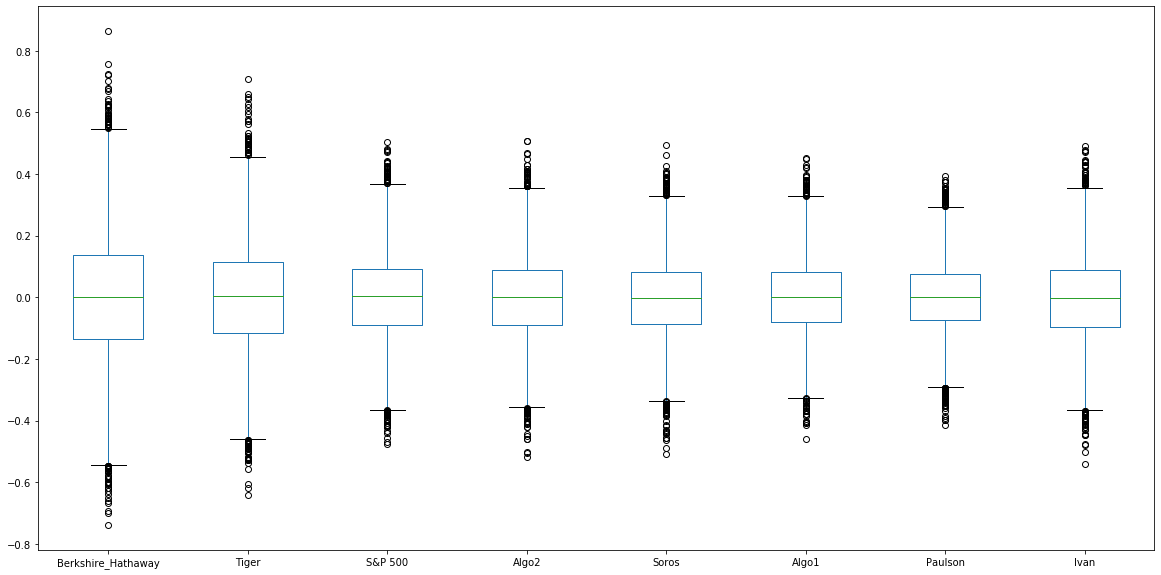

In [72]:
portfolio_std_1.plot.box(figsize=(20,10))

In [58]:
correlation_1 = combined_returns_1.corr()
correlation_1

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Ivan Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574,0.554379
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549,0.454172
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505,0.358682
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856,0.469759
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963,0.228671
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192,0.585351
SP500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000,-0.065412
Ivan Portfolio,0.554379,0.454172,0.358682,0.469759,0.228671,0.585351,-0.065412,1.000000


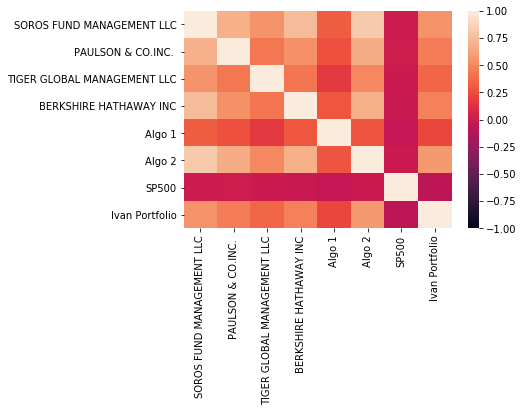

In [59]:
sns.heatmap(correlation_1, vmin=-1, vmax = 1)

In [61]:
# Custom Portoflio compared to teh S&P 500 
covariance_1 = combined_returns_1['Ivan Portfolio'].cov(combined_returns_1['SP500'])
variance_1 = combined_returns_1['SP500'].var()
covariance_1

-4.817560063200136e-06

In [62]:
# Variance of the Custom Portoflio vs the S&P 500 
variance_1

7.373467552840441e-05

In [63]:
# Beta of the Custom Portfolio vs. the S&P 500 
beta_1 = covariance_1/variance_1
beta_1

-0.0653364245339941

In [64]:
# Calculation of Sharpe Ration of Custom Portfolio 
sharpe_ratios_1 = (combined_returns_1.mean()*252) / (combined_returns_1.std() * np.sqrt(252))
sharpe_ratios_1


SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500                         -0.518582
Ivan Portfolio                 0.636404
dtype: float64

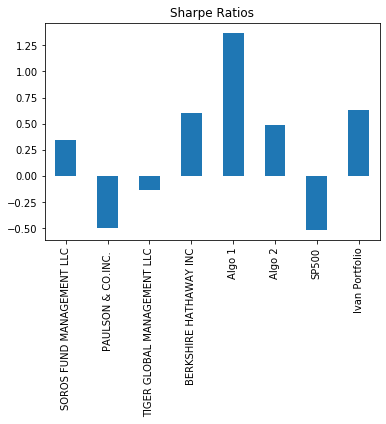

In [65]:
sharpe_ratios_1.plot(kind ='bar', title = 'Sharpe Ratios')